<div style="background-color: lightgreen; border-radius: 5px; padding: 10px;">
    <h4>Word Embedding Categorisation</h4>
    <p>...</p>
</div>

### Imports

In [8]:
from preprocessing_functions import *
from word_embedding_functions import *

import pandas as pd
import numpy as np
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

### 1. Set Topic Words
<br>
<div style="text-align: justify;">Using LDA topic modeling to find topics and their words through unsupervised clustering highly increases the performance of the model. Look at the pyLDAvis visualisation of the LDA topic model and change any parameters if you are not happy with the cluster distributions or if any clusters are overlapping. </div>
<br>
<div style="text-align: justify;">
A good topic model will have relatively big, similarly sized and non-overlapping bubbles scattered throughout the chart. Greater distances between the clusters represents a larger semantic difference, similarly sized bubbles show that the topics are equally represented, and large circles mean that the topics are well represented in the documents. By paying attention to these three characteristics we can get an accurate representation of the dominant topics of our documents and decide whether these clusters represent good, meaningful topics.
</div>

### 1.1 Use LDA Topic Modeling relevant words to topic *(RECOMMENDED)*

In [9]:
filename = "most_relevant_50_words_per_topic_1770_city_pairs_6_topics"
keywords_df = pd.read_csv(f"..\..\..\..\..\data\clean\\{filename}.csv")
keywords_df

,diplomacy,transportation,education,art,sport,entertainment
0,army,railway,university,paint,win,opera
1,embassy,route,professor,painting,match,festival
2,protest,line,art,painter,goal,perform
3,police,station,research,portrait,team,orchestra
4,arrest,operate,degree,father,final,music
5,diplomatic,service,science,marry,game,concert
6,treaty,airport,museum,family,club,film
7,mission,airline,graduate,daughter,score,symphony
8,war,flight,gallery,style,season,sing
9,attack,passenger,doctorate,fashion,league,premiere


In [10]:
len(list(keywords_df['diplomacy'])[:20])

20

In [12]:
lda_topic_words = {}
keywords_to_use = 20

for column in keywords_df:
    lda_topic_words[column] = list(keywords_df[column])[:keywords_to_use]

In [22]:
lda_topic_words.keys()

dict_keys(['diplomacy', 'transportation', 'education', 'art', 'sport', 'entertainment'])

### 1.2 Set up your own topic keywords

In [ ]:
# Removing words with double meaning helps (e.g. bear, degree)

#fashion_words = ['fashion', 'model', 'vogue', 'store', 'designer', 'couture', 'catwalk', 'runway', 'modeling', 'clothing', 'cosmetic', 'brand', 'retail', 'advertising', 'perfume']
diplomacy_words = ['War', 'Embassy', 'Army', 'Diplomatic', 'Ambassador', 'Treaty', 'Protest', 'Force', 'Mission', 'Arrest', 'Government', 'Police', 'Attack', 'Party', 'Minister']
entertainment_words = ['Opera', 'Festival', 'Perform', 'Orchestra', 'Symphony', 'Concert', 'Music', 'Film', 'Sing', 'Theatre', 'Performance', 'Role', 'Premiere', 'Tour', 'Band']
art_words = ['Exhibition', 'Art', 'Museum', 'Gallery', 'Exhibit', 'Painting', 'Collection', 'Paint', 'Portrait', 'Artist', 'Sculpture', 'Fashion', 'Design', 'Contemporary', 'Painter']
education_words = ['Study', 'School', 'Professor', 'University', 'Graduate', 'Educate', 'Lecture', 'Research', 'College', 'Teach', 'Science', 'Education', 'Philosophy', 'Doctorate', 'Faculty'] # replaced bear with educate and degree with Lecture
transportation_words = ['Railway', 'Route', 'Line', 'Operate', 'Flight', 'Station', 'Service', 'Airline', 'Airport', 'Train', 'Passenger', 'Speed', 'Aircraft', 'Rail', 'Network']
sport_words = ['Final', 'Win', 'Team', 'Match', 'Game', 'Goal', 'Club', 'League', 'Champion', 'Championship', 'Season', 'Score', 'Round', 'Tournament', 'Football']

lda_topic_words = { #'fashion': fashion_words,
                    'diplomacy': diplomacy_words,
                   'entertainment': entertainment_words,
                   'art': art_words,
                   'education': education_words,
                   'transportation': transportation_words,
                   'sport': sport_words}

### 2. Loading GloVe Word Embedding
<br>
<div style="text-align: justify;"> The word embedding model could be replaced by other ones fairly easy, but for now we decided to use the Common Crawl 840B token one  (source: https://nlp.stanford.edu/projects/glove/) by GloVe.</div>

In [14]:
%%time

embeddings_dict, discarded_dict = load_glove_word_embeddings(GLOVE_PATH="../../../../../glove.840B.300d.txt")

This will take approximately ~ 4 minutes...


  0%|          | 0/2196017 [00:00<?, ?it/s]

CPU times: total: 3min 17s
Wall time: 3min 23s


### 3. Get Topic Vectors
<br>
<div style="text-align: justify;">By taking the mean of the vectors that belong to the ~15 most relevant words of a topic we get a fairly accurate vector representation of a topic. We do this for each topic and save their vector value to a dictionary for later retrieval.</div>

In [15]:
mean_vectors_dict = {}
for topic in lda_topic_words:
    words = lda_topic_words[topic]
    words = [word for word in words if word in embeddings_dict.keys()] # checks if word is in vocabulary (i.e. has been seen by the model before)
    mean_embedding = np.mean([embeddings_dict[word.lower()] for word in words], axis=0)
    mean_vectors_dict[topic] = mean_embedding

### 4. Load Documents

In [27]:
from ast import literal_eval

df =  pd.read_csv("../../../../../data/clean/final_lda_classification_1770_city_pairs_6_topics.csv") 
df['merged_POS'] = df['merged_POS'].apply(literal_eval)

### Select number of paragraphs to process

In [52]:
sample_size = len(df)
sample = df[:sample_size]

### 5. Classify Paragraphs (with Word Embedding Algorithm)
#### 5.1 Select right parameters
<br>
<div style="text-align: justify;">bottom_threshold: If the similarity between a word and its closest topic is below the bottom_threshold it will be discarded from the classification process.
Verbose1 and Verbose2: Enabling these will print out the internal process of the algorithm.</div>

In [54]:
bottom_threshold = 0.20
verbose1 = False
verbose2 = False

In [55]:
%time
# ~40 mins for 311k paragraphs

topics = [key for key in list(sorted(mean_vectors_dict.keys()))]
nested_l = [['index']+topics+['embedding_dominant']]

for idx, row in tqdm(sample['merged_POS'].iteritems(), total=len(sample['merged_POS'])):
    output = categorize_text(lemmatized_wordlist=row, mean_vectors_dict=mean_vectors_dict, keywords=topics, embeddings_dict=embeddings_dict, bottom_threshold=bottom_threshold, verbose1=verbose1, verbose2=verbose2)
    
    temp_l = [idx] +[result[1] for result in output['category_similarities']] + [output['prediction']]
    
    #print(row, output['category_similarities'])
    
    if len(nested_l[0]) != len(temp_l):
        raise Exception('Not the same size!')
        
    nested_l.append(temp_l)


prediction_df = pd.DataFrame(nested_l[1:],columns=nested_l[0]).set_index('index')

CPU times: total: 0 ns
Wall time: 1.03 ms


  0%|          | 0/506302 [00:00<?, ?it/s]

In [56]:
prediction_df['embedding_dominant'].value_counts(normalize=True)

art               0.275174
entertainment     0.172470
transportation    0.154586
sport             0.148044
diplomacy         0.134641
education         0.115085
Name: embedding_dominant, dtype: float64

In [41]:
updated_df

,paragraph_id,city_pair,paragraph,merged_POS,indexer,lda_diplomacy,lda_transportation,lda_education,lda_art,lda_sport,...,lda_dominant_score,index_id,art,diplomacy,education,entertainment,sport,transportation,embedding_dominant,same_categorisation
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide...",0,0.646392,0.001234,0.001288,0.324088,0.000847,...,0.646392,0,5.711806,6.378929,0.972091,0.000000,2.071076,2.116942,diplomacy,True
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group...",1,0.000920,0.018644,0.000922,0.977949,0.000606,...,0.977949,1,8.354225,1.498827,1.730479,0.000000,1.904599,2.377542,art,True
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci...",2,0.001468,0.992814,0.001471,0.001752,0.000967,...,0.992814,2,0.509771,1.529264,1.358627,0.000000,1.207897,10.803357,transportation,True
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","[fashion, year, language, monitor, ranking, wo...",3,0.002832,0.439793,0.002837,0.549726,0.001865,...,0.549726,3,2.418018,1.339011,0.838248,0.000000,1.956553,0.372115,art,True
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde...",4,0.004585,0.889086,0.004593,0.005473,0.003019,...,0.889086,4,1.677460,0.386175,0.000000,0.000000,0.000000,2.532631,transportation,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10046,london_madrid,"in january 2007, longoria was chosen to be the...","[face, sport, spring, summer, campaign, contra...",9995,0.001656,0.033534,0.001659,0.321430,0.448326,...,0.448326,9995,3.372041,2.525474,0.406021,2.440954,2.482984,1.338234,art,False
9996,10047,london_madrid,at the european indoor championships in madrid...,"[championship, gold, world, record, m, world, ...",9996,0.001119,0.001074,0.001121,0.087723,0.907797,...,0.907797,9996,3.514554,1.860095,1.104912,0.000000,7.243019,1.952179,sport,True
9997,10048,london_madrid,gen re further operates in latin america (mexi...,"[city, cape, operate]",9997,0.015689,0.923200,0.015717,0.018727,0.010331,...,0.923200,9997,0.282752,0.000000,0.000000,0.000000,0.000000,1.176457,transportation,True
9998,10049,london_madrid,keller resides in seattle with his wife kristi...,"[seattle, wife, child, twin, family, year, cas...",9998,0.004585,0.004399,0.004593,0.978629,0.003019,...,0.978629,9998,3.548075,0.000000,0.000000,1.082965,0.505534,0.000000,art,True


### 6. Insert Classification into Dataset

In [57]:
updated_df = sample.join(prediction_df)
updated_df.head(2)
updated_df['same_categorisation'] = updated_df.apply(lambda x: x.lda_dominant.endswith(x.embedding_dominant), axis=1) # (updated_df['embedding_dominant'].isin('lda_dominant') 'lda_dominant'].str.contains() == updated_df['outcome'])

#### Similarity between lda topic model and word embedding algorithm output

In [70]:
threshold_requirement = (updated_df['lda_dominant_score'] > 0.7)
required_words_threshold_requirements = (updated_df['merged_POS'].str.len() > 10)

same_categorisation = updated_df[(updated_df['same_categorisation'] == True) & threshold_requirement & required_words_threshold_requirements]['same_categorisation'].count()
total_documents = updated_df[threshold_requirement & required_words_threshold_requirements]['same_categorisation'].count()

print(f"{same_categorisation} out of {total_documents} were classified the same by the LDA topic model and word embedding classification model. = {same_categorisation/total_documents} % similarity.")

295537 out of 336601 were classified the same by the LDA topic model and word embedding classification model. = 0.8780039274987299 % similarity.


In [72]:
print(updated_df[(updated_df['lda_dominant_score'] > 0.7) & (updated_df['merged_POS'].str.len() > 5)].groupby('lda_dominant')['same_categorisation'].value_counts())
print('----------------------------------------------------')
print(updated_df[(updated_df['lda_dominant_score'] > 0.7) & (updated_df['merged_POS'].str.len() > 5)].groupby('lda_dominant')['same_categorisation'].value_counts(normalize=True))

lda_dominant        same_categorisation
lda_art             True                   57041
                    False                   3927
lda_diplomacy       True                   45386
                    False                   8874
lda_education       True                   36659
                    False                  20275
lda_entertainment   True                   68069
                    False                   8720
lda_sport           True                   57271
                    False                    969
lda_transportation  True                   59246
                    False                   6589
Name: same_categorisation, dtype: int64
----------------------------------------------------
lda_dominant        same_categorisation
lda_art             True                   0.935589
                    False                  0.064411
lda_diplomacy       True                   0.836454
                    False                  0.163546
lda_education       True       

#### Binned LDA scores of all & differently classified paragraphs

In [73]:
updated_df['lda_dominant_score'].value_counts(bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).sort_index(ascending=False)

(0.9, 1.0]       281047
(0.8, 0.9]        60931
(0.7, 0.8]        46926
(0.6, 0.7]        47566
(0.5, 0.6]        44347
(0.4, 0.5]        21496
(0.3, 0.4]         3875
(0.2, 0.3]          114
(0.1, 0.2]            0
(-0.001, 0.1]         0
Name: lda_dominant_score, dtype: int64

In [74]:
updated_df[updated_df['same_categorisation'] != True]['lda_dominant_score'].value_counts(bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).sort_index(ascending=False) #  .sum() # .sort_index(ascending=False) #.sort_values(ascending=False)

(0.9, 1.0]       32368
(0.8, 0.9]       11400
(0.7, 0.8]       11140
(0.6, 0.7]       15893
(0.5, 0.6]       19639
(0.4, 0.5]       11281
(0.3, 0.4]        2334
(0.2, 0.3]          74
(0.1, 0.2]           0
(-0.001, 0.1]        0
Name: lda_dominant_score, dtype: int64

In [94]:
updated_df2 = updated_df

In [97]:
updated_df2.columns
updated_df2.drop(['lda_diplomacy', 'lda_transportation', 'lda_education', 'lda_art', 'lda_sport', 'lda_entertainment'], axis=1, inplace=True)
updated_df2

,paragraph_id,city_pair,paragraph,merged_POS,indexer,lda_dominant,lda_dominant_score,index_id,art,diplomacy,education,entertainment,sport,transportation,embedding_dominant,same_categorisation
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide...",0,lda_diplomacy,0.646392,0,5.711806,6.378929,0.972091,0.000000,2.071076,2.116942,diplomacy,True
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group...",1,lda_art,0.977949,1,8.354225,1.498827,1.730479,0.000000,1.904599,2.377542,art,True
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci...",2,lda_transportation,0.992814,2,0.509771,1.529264,1.358627,0.000000,1.207897,10.803357,transportation,True
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","[fashion, year, language, monitor, ranking, wo...",3,lda_art,0.549726,3,2.418018,1.339011,0.838248,0.000000,1.956553,0.372115,art,True
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde...",4,lda_transportation,0.889086,4,1.677460,0.386175,0.000000,0.000000,0.000000,2.532631,transportation,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506297,32,paris_marseille,"Since 1849, the Paris-Marseille railway passes...","[railway, northeast, station, line, rail, link...",506297,lda_transportation,0.990708,506297,0.719362,0.415189,0.000000,0.000000,0.358447,12.356155,transportation,True
506298,72,hamburg_bremen,"After the war, direct trade was minimal. What ...","[war, trade, port, city, tobacco, rice, cotton...",506298,lda_transportation,0.657007,506298,3.556275,6.578172,0.448824,0.377024,2.733063,5.290053,diplomacy,False
506299,301,london_zürich,At Vassar College Mann developed lifelong frie...,"[friendship, student, role, history, psycholog...",506299,lda_education,0.532335,506299,2.952755,2.466032,7.634809,0.665269,1.750068,1.830436,education,True
506300,84,munich_nuremberg,"Promoted to SS-'Oberführer', Scheel on 25 Apri...","[promote, base, transfer, encompass]",506300,lda_diplomacy,0.941534,506300,0.000000,0.000000,0.707924,0.000000,0.000000,0.963103,transportation,False


#### Saving "Classified Paragraphs" Dataframe

In [76]:
classified_paragraphs_filename = "final_embedding_classification_1770_city_pairs_6_topics"
updated_df.to_csv(f"..\..\..\..\..\data\clean\\{classified_paragraphs_filename}.csv", index=False)

In [ ]:
print(len(updated_df))
updated_df.head(5)

In [77]:
topics

['art', 'diplomacy', 'education', 'entertainment', 'sport', 'transportation']

In [78]:
# topics = sorted(['sport', 'art', 'diplomacy', 'education', 'entertainment', 'transportation'])
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
topic_values = []
for topic in topics:
    values = []
    for threshold in thresholds:
        #x.lda_dominant.endswith(x.embedding_dominant)
        values.append(updated_df[(updated_df['lda_dominant'].str.endswith(topic)) & (updated_df['lda_dominant_score'] > threshold) & (updated_df['merged_POS'].str.len() > 10)]['same_categorisation'].value_counts(normalize=True)[1])
        #df[(df['idxmax'] == )  & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)
    topic_values.append(values)

topic_values
new_topic_values = [[] for x in topic_values[0]]
for index, topic in enumerate(topic_values):
    for i, value in enumerate(topic):
        new_topic_values[i].append(value)
print(new_topic_values)

[[0.9039931387634639, 0.7574420175636118, 0.6049647563591787, 0.8374043800490909, 0.9768408352046117, 0.8671047179305038], [0.9274281342866391, 0.8070528451818632, 0.6292914600164736, 0.8677940849745808, 0.9829210733327506, 0.894803044295131], [0.9444119679013658, 0.8466363833008869, 0.6455527813024436, 0.8933935695846046, 0.9871434089278817, 0.9163758852997064], [0.9523819798049539, 0.8729888756090833, 0.6536586543102616, 0.9100135089496791, 0.9900180587803378, 0.9327761284344686], [0.9578606615059817, 0.890519577879015, 0.6608674419314471, 0.9238875148088874, 0.9921463612223772, 0.9454302780999059]]


#### Percentage of similarly classified documents between LDA topic modeling and word embedding classification

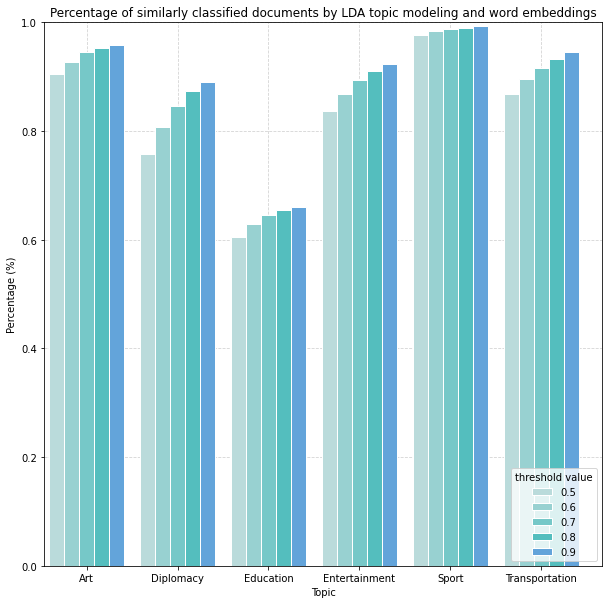

In [79]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10), facecolor="w")
# set width of bars
barWidth = 0.25

r1 =  np.arange(0, len(topic_values[0])+3, 1.50)
# r1 = np.arange(0, len(topic_values[0])+1.5, 1.50)
colors =["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#97d2fb", "#eccbd9", "#eccbd9"]
colors = [ "#badbdb","#98d1d1", "#76c8c8","#54bebe", "#63a4da", "#296ead", "#2a4693"]

for idx, topic in enumerate(new_topic_values):
    plt.bar(r1, topic, color=colors[idx], width=barWidth, edgecolor='white', label=thresholds[idx], zorder=3)
    r1= [x + barWidth for x in r1]

# Add xticks on the middle of the group bars
plt.ylabel('Percentage (%)', fontweight='normal')
plt.xlabel('Topic')
plt.xticks([0.5, 2, 3.5,  5, 6.5, 8], ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation'])
plt.ylim(0, 1)
plt.xlim(-0.2, 9)

# Create legend & Show graphic
plt.title('Percentage of similarly classified documents by LDA topic modeling and word embeddings')
plt.legend(title="threshold value", loc="lower right")
plt.grid(zorder=0, color='lightgray', linestyle='--')
plt.show()

### 7. Aggregate Paragraphs Classification into City Pair Classification

#### 5.1 Select right parameters

In [80]:
bottom_lda_threshold = 0.7
minimal_paragraph_length = 5

In [2]:
# import pandas as pd

# classified_paragraphs_filename = "final_embedding_classification_1770_city_pairs_6_topics"
# updated_df = pd.read_csv(f"..\..\..\..\..\data\clean\\{classified_paragraphs_filename}.csv")

In [81]:
temp_df = updated_df[(updated_df['city_pair'].isin(updated_df['city_pair'].unique()[:])) & (updated_df['lda_dominant_score'] > bottom_lda_threshold) & (updated_df['merged_POS'].str.len() > minimal_paragraph_length)]

In [84]:
temp_df

,paragraph_id,city_pair,paragraph,merged_POS,indexer,lda_diplomacy,lda_transportation,lda_education,lda_art,lda_sport,...,lda_dominant_score,index_id,art,diplomacy,education,entertainment,sport,transportation,embedding_dominant,same_categorisation
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group...",1,0.000920,0.018644,0.000922,0.977949,0.000606,...,0.977949,1,8.354225,1.498827,1.730479,0.000000,1.904599,2.377542,art,True
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci...",2,0.001468,0.992814,0.001471,0.001752,0.000967,...,0.992814,2,0.509771,1.529264,1.358627,0.000000,1.207897,10.803357,transportation,True
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde...",4,0.004585,0.889086,0.004593,0.005473,0.003019,...,0.889086,4,1.677460,0.386175,0.000000,0.000000,0.000000,2.532631,transportation,True
5,6,berlin_milan,the eu contains about 40 urban areas with popu...,"[area, population, population, area, megacity,...",5,0.004585,0.889086,0.093062,0.005473,0.003019,...,0.889086,5,1.095533,1.158526,0.422890,0.000000,0.000000,1.908880,transportation,True
6,7,berlin_milan,"by now, rossini's career was arousing interest...","[career, interest, revival, opera, lesson, yea...",6,0.001010,0.000969,0.001012,0.722405,0.000665,...,0.722405,6,8.924268,4.996654,2.099798,3.394894,1.470233,0.950067,art,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506293,211,hamburg_newcastle,"Upon delivery, 'Storstad' departed on 31 Janua...","[delivery, voyage, vessel, ton, iron, ore, tim...",506293,0.001255,0.993858,0.001257,0.001498,0.000826,...,0.993858,506293,2.876096,0.000000,0.000000,0.580419,1.805052,9.391764,transportation,True
506294,211,hamburg_antwerp,After the end of navigational season in Decemb...,"[end, season, ton, phosphate, pebble, ship, ca...",506294,0.000954,0.995328,0.000956,0.001139,0.000628,...,0.995328,506294,2.070105,0.716269,0.326642,0.000000,2.848659,10.500087,transportation,True
506295,219,bucharest_dortmund,"Șerban Ciochină (born November 30, 1939 in Buc...","[jump, athlete, place, jump, championship, yea...",506295,0.003387,0.003249,0.003393,0.004043,0.982402,...,0.982402,506295,0.450952,0.000000,0.000000,0.000000,5.564401,0.000000,sport,True
506296,467,newcastle_sheffield,Sheffield United signed Gillespie from Leeds C...,"[wage, week, debut, scoring, draw, point, meda...",506296,0.001010,0.000969,0.001012,0.001206,0.994751,...,0.994751,506296,2.638224,1.824342,0.000000,0.561181,19.383862,0.931289,sport,True


In [85]:
grouped_df = temp_df.groupby('city_pair')

In [86]:
nested_list2 = [['city_pair', 'paragraphs', 'lemmatised_paragraph_length', 'same_categorisation_raw', 'same_categorisation_percentage',
                'lda_dominant_category', 'embedding_dominant_category', 'lda_art', 'embedding_art', 'lda_diplomacy',
                'embedding_diplomacy', 'lda_education', 'embedding_education', 'lda_entertainment', 'embedding_entertainment', 
                'lda_sport', 'embedding_sport', 'lda_transportation', 'embedding_transportation']]

In [87]:
from IPython.display import display

lda_categories = list(temp_df['lda_dominant'].unique())
embedding_categories = list(temp_df['embedding_dominant'].unique())

for city_pair, sub_df in tqdm(grouped_df):
    paragraph_count = sub_df['paragraph'].count()
    same_categorisation_raw = sub_df['same_categorisation'].sum()
    same_categorisation_percentage = sub_df['same_categorisation'].sum()/sub_df['same_categorisation'].count()
    lemmatised_paragraph_len = sub_df['merged_POS'].str.len().mean()
    
    lda_prediction = sub_df['lda_dominant'].value_counts()
    embedding_prediction = sub_df['embedding_dominant'].value_counts()
        
    lda_dominant_category = lda_prediction.idxmax()
    embedding_dominant_category = embedding_prediction.idxmax()
    
    lda_prediction = lda_prediction.to_dict()
    embedding_prediction = embedding_prediction.to_dict()
    
    if (len(lda_prediction) != len(lda_categories)):
        for category in lda_categories:
            if category not in lda_prediction.keys():
                lda_prediction[category] = 0
                
    if (len(embedding_prediction) != len(embedding_categories)):
        for category in embedding_categories:
            if category not in embedding_prediction.keys():
                embedding_prediction[category] = 0
                
    temp_l2 = [city_pair, paragraph_count, lemmatised_paragraph_len, same_categorisation_raw, same_categorisation_percentage,
                lda_dominant_category, embedding_dominant_category, lda_prediction['lda_art'], embedding_prediction['art'], lda_prediction['lda_diplomacy'],
                embedding_prediction['diplomacy'], lda_prediction['lda_education'], embedding_prediction['education'],
                lda_prediction['lda_entertainment'], embedding_prediction['entertainment'], lda_prediction['lda_sport'],
                embedding_prediction['sport'], lda_prediction['lda_transportation'], embedding_prediction['transportation']]
    if len(nested_list2[0]) != len(temp_l2):
        raise Exception('Not the same size!')
    
    nested_list2.append(temp_l2)

  0%|          | 0/1626 [00:00<?, ?it/s]

In [90]:
final_df = pd.DataFrame(nested_list2[1:],columns=nested_list2[0])

In [92]:
final_df

,city_pair,paragraphs,lemmatised_paragraph_length,same_categorisation_raw,same_categorisation_percentage,lda_dominant_category,embedding_dominant_category,lda_art,embedding_art,lda_diplomacy,embedding_diplomacy,lda_education,embedding_education,lda_entertainment,embedding_entertainment,lda_sport,embedding_sport,lda_transportation,embedding_transportation
0,amsterdam_antwerp,604,28.750000,535,0.885762,lda_art,art,262,288,85,74,45,31,65,62,40,48,107,101
1,amsterdam_bilbao,37,23.513514,30,0.810811,lda_entertainment,entertainment,1,5,4,4,3,2,18,16,3,4,8,6
2,amsterdam_bremen,81,28.395062,72,0.888889,lda_transportation,art,13,19,15,10,10,8,16,16,11,11,16,17
3,amsterdam_dortmund,47,25.723404,44,0.936170,lda_transportation,transportation,3,2,3,4,2,2,9,9,12,13,18,17
4,amsterdam_dresden,128,28.421875,113,0.882812,lda_entertainment,entertainment,40,51,5,3,11,7,63,56,3,4,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,zürich_bremen,23,29.478261,20,0.869565,lda_entertainment,sport,0,1,1,1,2,1,9,8,8,9,3,3
1622,zürich_dresden,70,19.657143,63,0.900000,lda_entertainment,entertainment,7,11,2,3,11,8,38,35,8,9,4,4
1623,zürich_oslo,52,22.000000,41,0.788462,lda_education,entertainment,2,9,2,4,19,10,12,11,11,11,6,7
1624,zürich_palermo,13,28.000000,13,1.000000,lda_entertainment,entertainment,1,1,1,1,0,0,8,8,3,3,0,0


#### Saving "Classified City Pairs" Dataframe

In [93]:
classified_paragraphs_filename = "final_embedding_classification_1770_city_pairs_6_topics_grouped_by_city_pair"
final_df.to_csv(f"..\..\..\..\..\data\clean\\{classified_paragraphs_filename}.csv", index=False)

### 8. Normalise classification (by number of paragraphs)

In [4]:
classified_paragraphs_filename = "final_embedding_classification_1770_city_pairs_6_topics_grouped_by_city_pair"
final_df = pd.read_csv(f"..\..\..\..\..\data\clean\\{classified_paragraphs_filename}.csv")

In [5]:
# Normalize category outcomes
final_df_normalised = final_df
final_df_normalised[list(final_df_normalised.columns)[7:]] = final_df_normalised[list(final_df_normalised.columns)[7:]].div(final_df_normalised['paragraphs'], axis=0) # .count()

final_df_normalised

,city_pair,paragraphs,lemmatised_paragraph_length,same_categorisation_raw,same_categorisation_percentage,lda_dominant_category,embedding_dominant_category,lda_art,embedding_art,lda_diplomacy,embedding_diplomacy,lda_education,embedding_education,lda_entertainment,embedding_entertainment,lda_sport,embedding_sport,lda_transportation,embedding_transportation
0,amsterdam_antwerp,604,28.750000,535,0.885762,lda_art,art,0.433775,0.476821,0.140728,0.122517,0.074503,0.051325,0.107616,0.102649,0.066225,0.079470,0.177152,0.167219
1,amsterdam_bilbao,37,23.513514,30,0.810811,lda_entertainment,entertainment,0.027027,0.135135,0.108108,0.108108,0.081081,0.054054,0.486486,0.432432,0.081081,0.108108,0.216216,0.162162
2,amsterdam_bremen,81,28.395062,72,0.888889,lda_transportation,art,0.160494,0.234568,0.185185,0.123457,0.123457,0.098765,0.197531,0.197531,0.135802,0.135802,0.197531,0.209877
3,amsterdam_dortmund,47,25.723404,44,0.936170,lda_transportation,transportation,0.063830,0.042553,0.063830,0.085106,0.042553,0.042553,0.191489,0.191489,0.255319,0.276596,0.382979,0.361702
4,amsterdam_dresden,128,28.421875,113,0.882812,lda_entertainment,entertainment,0.312500,0.398438,0.039062,0.023438,0.085938,0.054688,0.492188,0.437500,0.023438,0.031250,0.046875,0.054688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,zürich_bremen,23,29.478261,20,0.869565,lda_entertainment,sport,0.000000,0.043478,0.043478,0.043478,0.086957,0.043478,0.391304,0.347826,0.347826,0.391304,0.130435,0.130435
1622,zürich_dresden,70,19.657143,63,0.900000,lda_entertainment,entertainment,0.100000,0.157143,0.028571,0.042857,0.157143,0.114286,0.542857,0.500000,0.114286,0.128571,0.057143,0.057143
1623,zürich_oslo,52,22.000000,41,0.788462,lda_education,entertainment,0.038462,0.173077,0.038462,0.076923,0.365385,0.192308,0.230769,0.211538,0.211538,0.211538,0.115385,0.134615
1624,zürich_palermo,13,28.000000,13,1.000000,lda_entertainment,entertainment,0.076923,0.076923,0.076923,0.076923,0.000000,0.000000,0.615385,0.615385,0.230769,0.230769,0.000000,0.000000


In [6]:
classified_paragraphs_filename_normalised = "final_embedding_classification_1770_city_pairs_6_topics_grouped_by_city_pair_normalised"
final_df_normalised.to_csv("..\..\..\..\..\data\clean\\{classified_paragraphs_filename_normalised}.csv", index=False)

### Extras

#### Show closest words to topic vector

In [ ]:
topic = 'art'

words = find_closest_embeddings(embedding=
     mean_vectors_dict[topic]    # embeddings_dict['diplomacy'] # embeddings_dict['fashion']
)[:2000]

In [ ]:
english_words = get_english_words(path='../../../input/english_words_alpha_370k.txt
print(remove_non_existing_words_from_wordlist(words, english_words))

### Co-occurrence matrix

In [ ]:
import ast
ty['city_pair'] = ty['city_pair'].apply(ast.literal_eval)
ct = ty['city_pair2'].value_counts().to_frame()
ct['city1'] = ct['city_pair'].apply(lambda li: list(li)[0])
ct['city2'] = ct['city_pair'].apply(lambda li: list(li)[1])

corpus = pd.DataFrame(columns=sorted(list(c)))
corpus['index'] = sorted(list(c))
corpus.set_index('index', inplace=True)
corpus.fillna(0, inplace=True)

for index, row in ct.iterrows():
    #print(row.city1, row.city2)
    corpus.at[row.city1, row.city2] = corpus.loc[row.city1,row.city2] + row.city_pair2
    corpus.at[row.city2, row.city1] = corpus.loc[row.city2,row.city1] + row.city_pair2
    
# ct[(ct['city1'] == 'berlin') & (ct['city2'] == 'amsterdam')]
corpus